In [1]:
import numpy as np
import pandas as pd
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords

In [2]:
# !pip3 install nltk

In [3]:
# Reading data from sqlteTable.
connection = sqlite3.connect('database.sqlite') 

In [4]:
#Filter only -ve or +ve reviews
filtered_data = pd.read_sql_query("""SELECT * FROM Reviews where score!=3 LIMIT 5000""", connection) 

In [5]:
def partition(x):
    if x < 3:
        return 0
    return 1

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (5000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [6]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [7]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(4986, 10)

In [8]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

99.72

In [9]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [10]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...


In [11]:
final['Text'].head()

2546    Why is this $[...] when the same product is av...
2547    We have used the Victor fly bait for 3 seasons...
1145    I just received my shipment and could hardly w...
1146    This was a really good idea and the final prod...
2942    I'm glad my 45lb cocker/standard poodle puppy ...
Name: Text, dtype: object

In [12]:
final['Score'].value_counts()

1    4178
0     808
Name: Score, dtype: int64

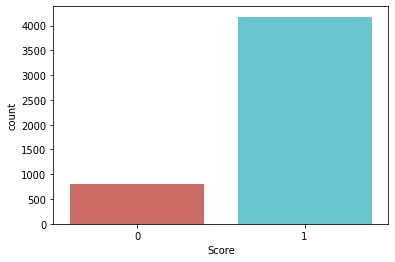

In [13]:
sns.countplot(x = 'Score', data = final, palette = 'hls')
plt.show()
#Below figures says we have imbalance data

In [14]:
stop = set(stopwords.words('english')) #set of stopwords
print(stop)

{'very', 'then', 'weren', 'all', "you'll", 'needn', 'further', 'whom', 'as', 'most', 'but', 'at', 'above', 'yours', "hadn't", 'herself', 'couldn', 'an', 'too', 'until', 'any', 'should', 'are', 'me', 'and', 'wasn', 'no', 'm', 'over', 'same', 'down', 'hers', 'once', 'each', 'between', "mustn't", 'so', 'we', "it's", 'doing', 'ma', 'doesn', 'which', 'themselves', "you'd", 'didn', 'yourselves', 'hasn', 'haven', 'theirs', 'our', 'when', "should've", 'him', 'only', 'yourself', 'who', 'of', 'have', 'that', 'ourselves', 'more', "that'll", 'during', 'few', 'how', 'd', "haven't", 'shan', 'their', 'now', "doesn't", 'nor', 'itself', 'up', 'is', 'on', "don't", 'were', 'aren', "needn't", 'before', 'don', 'had', 's', 'he', 'myself', 'the', "won't", 'mustn', 'off', 'there', 'in', 'here', 'both', 'has', 'where', 'can', 'himself', 'ours', 'into', 'll', 'been', 'this', 'what', 'be', 'below', 'isn', 'against', "wasn't", 'hadn', 'under', "shouldn't", 'shouldn', "she's", "wouldn't", 'them', 't', 'for', 've',

In [15]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [16]:
import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
# Text Preprocessing
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 4986/4986 [00:00<00:00, 9223.85it/s]


In [18]:
# !pip install lxml

In [19]:
preprocessed_reviews[0]

'product available victor traps unreal course total fly genocide pretty stinky right nearby'

In [20]:
preprocessed_reviews[100]

'although seems like great product definitely not minced cans say minced not ground beef cat likes minced not chunks not ground although eat ground cat food sometimes inviting delicious yet walks away hate packaging lies contents product shipping speedy value great long deliver promise stuck food cat wont eat'